# SOM avec Python

Les packages de SOM (Self Organising Map) de Python sont incomplets et ne permettent par exemple pas, dans ce qui est connu, d'extraire les *components* ou variables de la map. R sera donc plutôt utilisé pour réaliser les SOMs. Cependant il est tout de même intéressant de tester avec les packages disponibles. 



In [8]:
import os
print os.getcwd() 

import sys
print sys.path
sys.path.append('C:/Python27/Lib')
sys.path.append('C:/Python27/Lib/site-packages')

import KohonenUtils
import numpy as np
import pandas as pd
import matplotlib.pyplot as pl
from matplotlib import cm
import matplotlib.patches as mpatches
import math
%matplotlib inline

C:\Users\thsch\Desktop\Bachelor_Thesis_2017_Sources\Notebook\DataAnalysis
['', 'C:\\ProgramData\\Anaconda2\\python27.zip', 'C:\\ProgramData\\Anaconda2\\DLLs', 'C:\\ProgramData\\Anaconda2\\lib', 'C:\\ProgramData\\Anaconda2\\lib\\plat-win', 'C:\\ProgramData\\Anaconda2\\lib\\lib-tk', 'C:\\ProgramData\\Anaconda2', 'C:\\Users\\thsch\\AppData\\Roaming\\Python\\Python27\\site-packages', 'C:\\ProgramData\\Anaconda2\\lib\\site-packages', 'C:\\ProgramData\\Anaconda2\\lib\\site-packages\\Sphinx-1.5.1-py2.7.egg', 'C:\\ProgramData\\Anaconda2\\lib\\site-packages\\win32', 'C:\\ProgramData\\Anaconda2\\lib\\site-packages\\win32\\lib', 'C:\\ProgramData\\Anaconda2\\lib\\site-packages\\Pythonwin', 'C:\\ProgramData\\Anaconda2\\lib\\site-packages\\setuptools-27.2.0-py2.7.egg', 'C:\\ProgramData\\Anaconda2\\lib\\site-packages\\IPython\\extensions', 'C:\\Users\\thsch\\.ipython', 'C:/Python27/Lib', 'C:/Python27/Lib/site-packages']


## Loading dataset

In [23]:
print df.columns
print("\n")
print df.shape

    
print df.isnull().values.any()
for d in df.dtypes:
    print d

Index([u'SICA 1', u'prec1', u'prec2', u'prec3', u'prec4', u'prec5', u'prec6',
       u'prec7', u'prec8', u'prec9',
       ...
       u'Acidez', u'Cuerpo', u'Sabor', u'Sabor residual', u'Dulzor',
       u'Uniformidad', u'Balance', u'Taza limpia', u'Puntaje catador',
       u'Puntaje Total'],
      dtype='object', length=107)


(767, 107)
False
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float

In [16]:
cols = ['SICA 1',
        'prec1','prec2','prec3','prec4','prec5','prec6','prec7','prec8','prec9','prec10',
        'tmin1','tmin2','tmin3','tmin4','tmin5','tmin6','tmin7','tmin8','tmin9','tmin10',
        'tmax1','tmax2','tmax3','tmax4','tmax5','tmax6','tmax7','tmax8','tmax9','tmax10',
        'tmean1','tmean2','tmean3','tmean4','tmean5','tmean6','tmean7','tmean8','tmean9','tmean10',
        'dtr1','dtr2','dtr3','dtr4','dtr5','dtr6','dtr7','dtr8','dtr9','dtr10',
        'PrecTotalAvg','TminTotalAvg','TmaxTotalAvg','TmeanTotalAvg','DtrTotalAvg',
        'PrecTotal','TminTotal','TmaxTotal','TmeanTotal','DtrTotal',
        'year','ASNM',
        "pH_avg","org_avg",
        "franco_L1","arcilloso_L1","limoso_L1","arenoso_L1","cascajoso_L1",
        "franco_L2","arcilloso_L2","limoso_L2","arenoso_L2","cascajoso_L2",
        "franco_L3","arcilloso_L3","limoso_L3","arenoso_L3","cascajoso_L3",
        'Negros y vinagres','Broca','Broca de punto','Veteado',
        'Inmaduro','Flojo','Sobresecado','Arrugado','Aplastado','Cristalizado','Reposado','Granizo',
        'Partido','Defectos totales','Humedad (%)','Merma (%)','Aroma-Fragancia',
        'Acidez','Cuerpo','Sabor','Sabor residual','Dulzor','Uniformidad','Balance','Taza limpia','Puntaje catador','Puntaje Total']

print cols.index("cascajoso_L3")
inputData = cols[:80]
outputData = cols[80:]

print inputData[-1]

print outputData[0]

df = df[cols]

79
cascajoso_L3
Negros y vinagres


TypeError: unhashable type: 'numpy.ndarray'

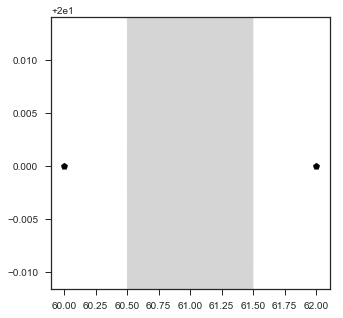

In [28]:





kmap = KohonenUtils.KohonenMap(50,
                               50,
                               size_vector=len(df.columns))
n_iter = 5
learning_rate = KohonenUtils.ExponentialTimeseries(1, 0.2, n_iter * len(df.index))
neighborhood_size = KohonenUtils.ExponentialTimeseries(4./3 * len(df.index), 1, n_iter * len(df.index))

kmap.train(df.as_matrix(), np.array(df[outputData]), n_iter, learning_rate, neighborhood_size)

kmap.plot_umatrix(plot_names=False, plot_empty=True, fontsize=80, color_classes=True)

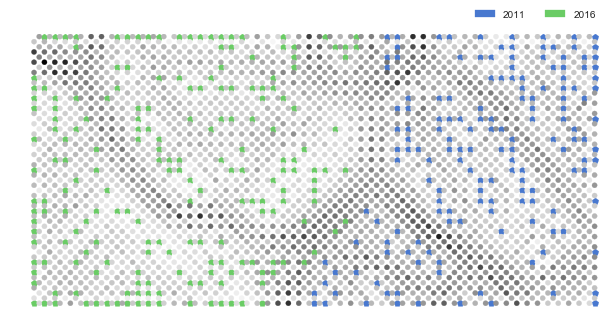

In [27]:
kmap = KohonenUtils.KohonenMap(side_rows=int(math.sqrt(len(df.index))),
                               side_cols=int(math.sqrt(len(df.index)) * 2),
                               size_vector=len(df.columns)-1)
n_iter = 6
learning_rate = KohonenUtils.ExponentialTimeseries(1, 0.2, n_iter * len(df.index))
neighborhood_size = KohonenUtils.ExponentialTimeseries(4./3 * len(df.index), 1, n_iter * len(df.index))

kmap.train(df.as_matrix()[:,:-1], np.array(df.year), n_iter, learning_rate, neighborhood_size)



kmap.plot_umatrix(color_classes=True)

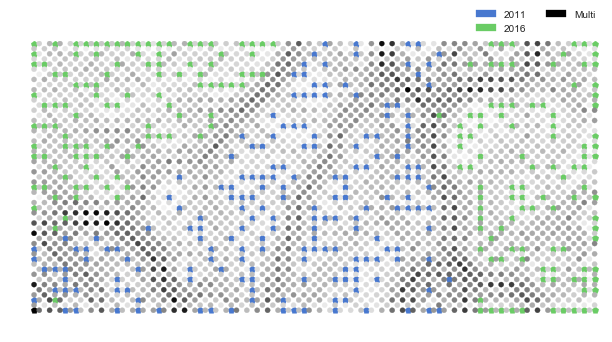

In [29]:
kmap = KohonenUtils.KohonenMap(side_rows=int(math.sqrt(len(df.index))),
                               side_cols=int(math.sqrt(len(df.index)) * 2),
                               size_vector=len(df.columns)-1)
n_iter = 10
learning_rate = KohonenUtils.ExponentialTimeseries(1, 0.2, n_iter * len(df.index))
neighborhood_size = KohonenUtils.ExponentialTimeseries(4./3 * len(df.index), 1, n_iter * len(df.index))

kmap.train(df.as_matrix()[:,:-1], np.array(df.year), n_iter, learning_rate, neighborhood_size)

kmap.plot_umatrix(color_classes=True)

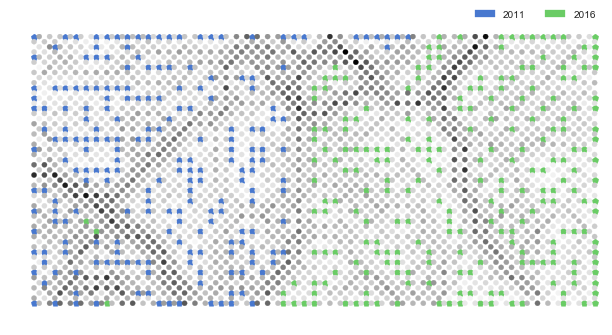

In [30]:
kmap = KohonenUtils.KohonenMap(side_rows=int(math.sqrt(len(df.index))),
                               side_cols=int(math.sqrt(len(df.index)) * 2),
                               size_vector=len(df.columns)-1)
n_iter = 20
learning_rate = KohonenUtils.ExponentialTimeseries(1, 0.2, n_iter * len(df.index))
neighborhood_size = KohonenUtils.ExponentialTimeseries(4./3 * len(df.index), 1, n_iter * len(df.index))

kmap.train(df.as_matrix()[:,:-1], np.array(df.year), n_iter, learning_rate, neighborhood_size)

kmap.plot_umatrix(color_classes=True)